In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv('./data/results.csv')
results.tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
45090,2023-10-17,Zambia,Uganda,3,0,Friendly,Sharjah,United Arab Emirates,True
45091,2023-10-17,Morocco,Liberia,3,0,African Cup of Nations qualification,Agadir,Morocco,False
45092,2023-10-17,England,Italy,3,1,UEFA Euro qualification,London,England,False
45093,2023-10-17,Malta,Ukraine,1,3,UEFA Euro qualification,Ta' Qali,Malta,False
45094,2023-10-17,Serbia,Montenegro,3,1,UEFA Euro qualification,Belgrade,Serbia,False
45095,2023-10-17,Lithuania,Hungary,2,2,UEFA Euro qualification,Kaunas,Lithuania,False
45096,2023-10-17,Finland,Kazakhstan,1,2,UEFA Euro qualification,Helsinki,Finland,False
45097,2023-10-17,Northern Ireland,Slovenia,0,1,UEFA Euro qualification,Belfast,Northern Ireland,False
45098,2023-10-17,San Marino,Denmark,1,2,UEFA Euro qualification,Serravalle,San Marino,False
45099,2023-10-23,United Arab Emirates,Kuwait,1,0,Friendly,Dubai,United Arab Emirates,False


In [3]:
home_games = results.loc[results['home_team'] == 'France']
away_games = results.loc[results['away_team'] == 'France']



In [4]:
"""
Adding year as a column
"""
results['year'] = results['date'].apply(lambda x:int(x.split('-')[0]))

In [5]:
"""
Adding winner as a column
"""

results.loc[results.home_score > results.away_score, 'winner'] = results.home_team
results.loc[results.home_score < results.away_score, 'winner'] = results.away_team
results.loc[results.home_score == results.away_score, 'winner'] = 'Draw'

In [6]:
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland
...,...,...,...,...,...,...,...,...,...,...,...
45095,2023-10-17,Lithuania,Hungary,2,2,UEFA Euro qualification,Kaunas,Lithuania,False,2023,Draw
45096,2023-10-17,Finland,Kazakhstan,1,2,UEFA Euro qualification,Helsinki,Finland,False,2023,Kazakhstan
45097,2023-10-17,Northern Ireland,Slovenia,0,1,UEFA Euro qualification,Belfast,Northern Ireland,False,2023,Slovenia
45098,2023-10-17,San Marino,Denmark,1,2,UEFA Euro qualification,Serravalle,San Marino,False,2023,Denmark


In [7]:
"""
Getting number of game and won game for a country since a certain year
"""

def win_percentage(team, since):
    home_games = results.loc[(results['home_team'] == team) & (results['year'] >= since)]
    away_games = results.loc[(results['away_team'] == team) & (results['year'] >= since)]

    won_home = len(home_games.loc[home_games['home_score'] > home_games['away_score']])
    won_away = len(away_games.loc[away_games['away_score'] > away_games['home_score']])
    
    
    total_games = len(home_games) + len(away_games)

    if(total_games == 0):
        return 0

    p_win = (won_away + won_home) / total_games

    return p_win

team = 'Italy'
since = 2022

print(win_percentage(team, since))

0.47368421052631576


In [8]:
"""
Getting percentage of won game between 2 teams
"""

team_a = 'France'
team_b = 'Switzerland'

home_games = results.loc[(results['home_team'] == team_a) & (results['away_team'] == team_b) & (results['year'] > 2000)]
away_games = results.loc[(results['away_team'] == team_a) & (results['home_team'] == team_b) & (results['year'] > 2000)]

print(len(home_games))
print(len(away_games))

away_games.head()
home_games.head()


4
4


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner
27785,2005-03-26,France,Switzerland,0,0,FIFA World Cup qualification,Saint-Denis,France,False,2005,Draw
28750,2006-06-13,France,Switzerland,0,0,FIFA World Cup,Stuttgart,Germany,True,2006,Draw
38571,2016-06-19,France,Switzerland,0,0,UEFA Euro,Villeneuve-d'Ascq,France,False,2016,Draw
42832,2021-06-28,France,Switzerland,3,3,UEFA Euro,Bucharest,Romania,True,2021,Draw


(array([16.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         1.,  2.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
         0.,  0.,  1.,  2.,  2.,  2.,  2.,  6.,  1.,  0.,  2.,  2.,  6.,
         2.,  2.,  4.,  1.,  1.,  3.,  2.,  1.,  4.,  2.,  0.,  5.,  4.,
         5.,  3.,  2.,  0.,  3.,  3.,  4.,  1.,  2.,  5.,  7.,  4.,  6.,
         2.,  9.,  1.,  1.,  6.,  2.,  3.,  3.,  5.,  1.,  5.,  4.,  6.,
         6.,  5.,  8.,  8.,  3.,  6.,  3.,  4.,  3.,  3.,  2.,  3.,  4.,
         2.,  4.,  0.,  6.,  2.,  2.,  1.,  2.,  1.,  6.,  2.,  2.,  0.,
         0.,  3.,  1.,  0.,  0.,  4.,  0.,  1.,  0.,  0.,  2.,  1.,  0.,
         2.,  1.,  2.,  2.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
         2.,  0.,  0.,  4.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

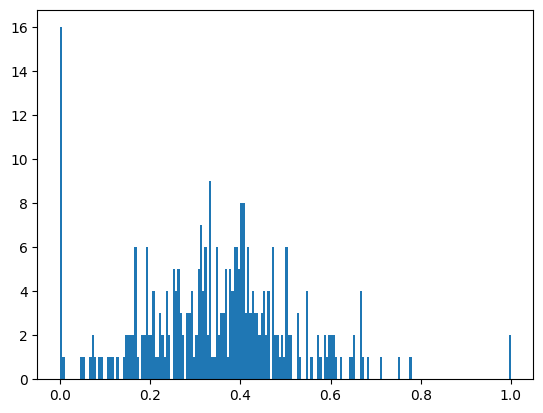

In [9]:
home_team = list(results.where(results['year'] > 2000)['home_team'].unique())
away_team = list(results.where(results['year'] > 2000)['away_team'].unique())

teams = set(home_team + away_team)

vals = []

for t in teams:
    vals.append(win_percentage(t, 2000))

fix, ax = plt.subplots()
ax.hist(vals, bins=200)

In [10]:
"""
Team result
"""

teams = ['Portugal', 'England', 'Switzerland', 'Serbia', 'France', 'Italy', 'Spain', 'Finland', 'Iceland']

for team in teams:
    matches_home = results.loc[(results['home_team'] == team) & (results['year'] >= 2000)]
    matches_away = results.loc[(results['away_team'] == team) & (results['year'] >= 2000)]

    matches_home = matches_home.assign(goal_d = lambda x: x.home_score - x.away_score)
    matches_away = matches_away.assign(goal_d = lambda x: x.away_score - x.home_score)

    goals_difference = np.array(list(matches_home.goal_d) + list(matches_away.goal_d))
    goals = np.array(list(matches_home.home_score) + list(matches_away.away_score))

    # fix, ax = plt.subplots()
    # ax.hist(goals, bins=10)

In [11]:
team_a = 'England'
team_b = 'France'

matches = results.loc[(((results['home_team'] == team_a) & (results['away_team'] == team_b)) | ((results['home_team'] == team_b) & (results['away_team'] == team_a))) & (results['year'] >= 1900)]

print(len(matches))

team_a_wins = matches.loc[results['winner'] == team_a]
team_b_wins = matches.loc[results['winner'] == team_b]
draw = matches.loc[results['winner'] == 'Draw']

print(len(team_a_wins)/len(matches) * 100)
print(len(team_b_wins)/len(matches) * 100)
print(len(draw)/len(matches) * 100)

34
50.0
32.35294117647059
17.647058823529413


In [12]:
"""
Average goals for a team
"""

team = 'France'

home_games = results.loc[(results['home_team'] == team) & (results['year'] >= since)]
away_games = results.loc[(results['away_team'] == team) & (results['year'] >= since)]

goals_scored = list(home_games.home_score) + list(away_games.away_score)

(array([3., 0., 6., 0., 7., 0., 3., 0., 3., 1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

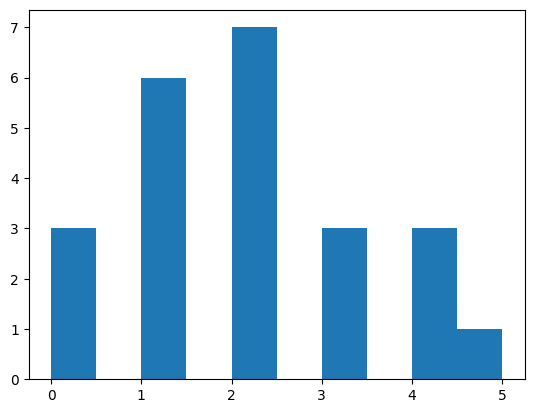

In [13]:
fix, ax = plt.subplots()
ax.hist(x = goals_scored, bins=10)

In [14]:
"""
Average goals for a team against another team
"""

team_a = 'Albania'
team_b = 'Croatia'

home = results.loc[(results['home_team'] == team_a) & (results['away_team'] == team_b) & (results['year'] >= 2010)]
away = results.loc[(results['home_team'] == team_b) & (results['away_team'] == team_a) & (results['year'] >= 2010)]

goals_team_a = np.array(list(home.home_score) + list(away.away_score))
goals_team_b = np.array(list(home.away_score) + list(away.home_score))

print(goals_team_a)
print(goals_team_b)





[]
[]


In [16]:
from simulator import *

teams = [
    [
        'Albania',
        'Austria',
        'Belgium',
        'Croatia'
    ],
    [
        'Denmark',
        'England',
        'France',
        'Germany'
    ],
    [
        'Hungary',
        'Italia',
        'Netherlands',
        'Portugal'
    ],
    [
        'Romania',
        'Scotland',
        'Serbia',
        'Slovakia'
    ],
    [
        'Slovenia',
        'Spain',
        'Switzerland',
        'Turkey'
    ]
]

s = Simulator(teams, results)

s.simulate_group_stage()

Denmark 0 : 1 England
Denmark 0 : 1 France
Denmark 1 : 1 Germany
England 2 : 1 France
England 1 : 1 Germany
France 1 : 1 Germany


ValueError: lam < 0 or lam is NaN